In [47]:
# variar: 1 hop and 2 hops
# na sala mexer os nós e um gráfico in real time
# line of sight e variar: buildings no meio e não
# packet size = default (84 bytes), 100 bytes, 200 bytes

#RTT (Round Trip Time): This is typically measured in milliseconds (ms).
#Jitter: This is also usually measured in milliseconds (ms).
#PDR (Packet Delivery Rate): This is typically measured as a percentage (%), indicating the proportion of packets that have reached their destination successfully.
#Distance: This can vary widely depending on context, but in many network-related studies, it might be in meters (m) or in terms of network hops.

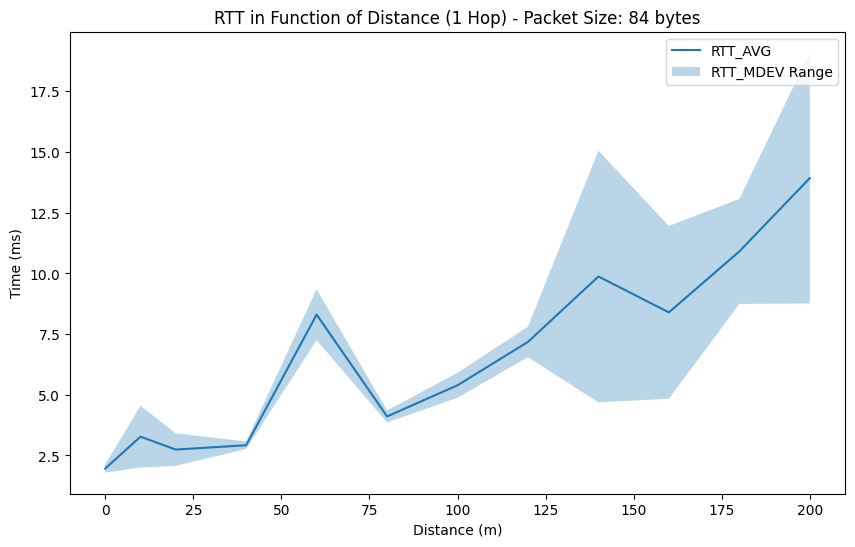

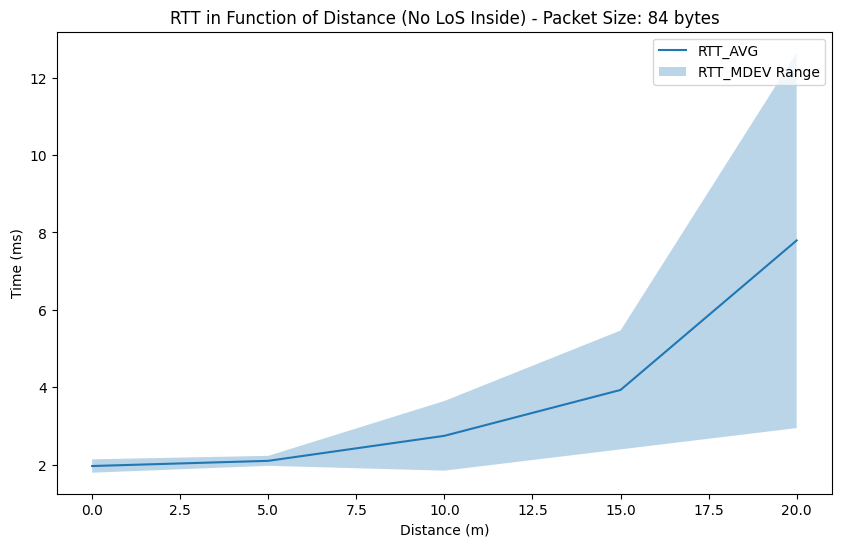

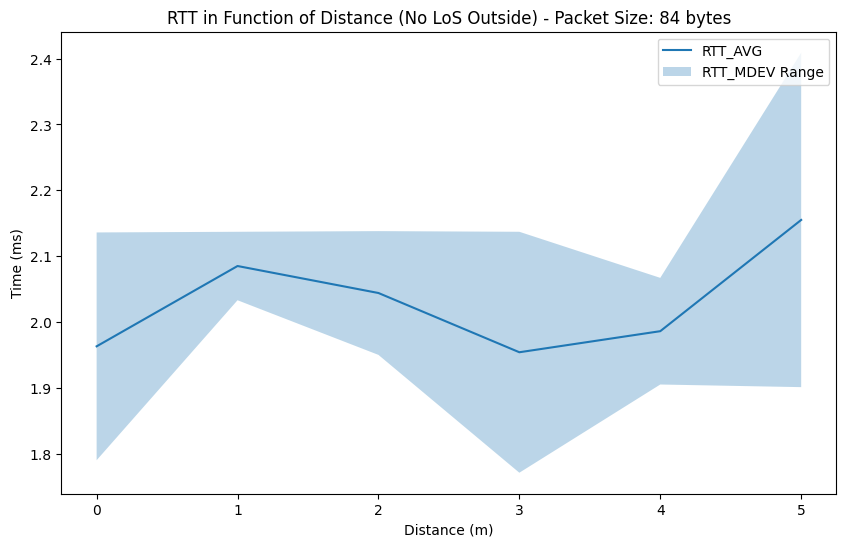

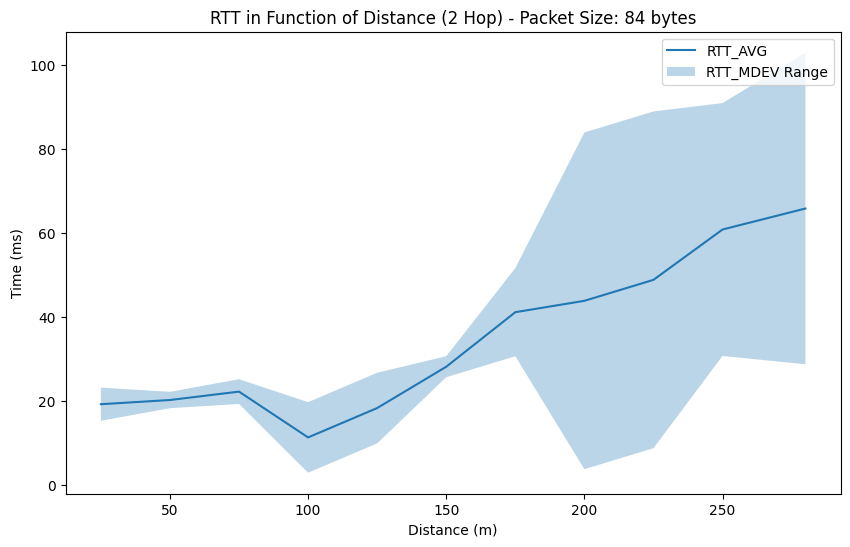

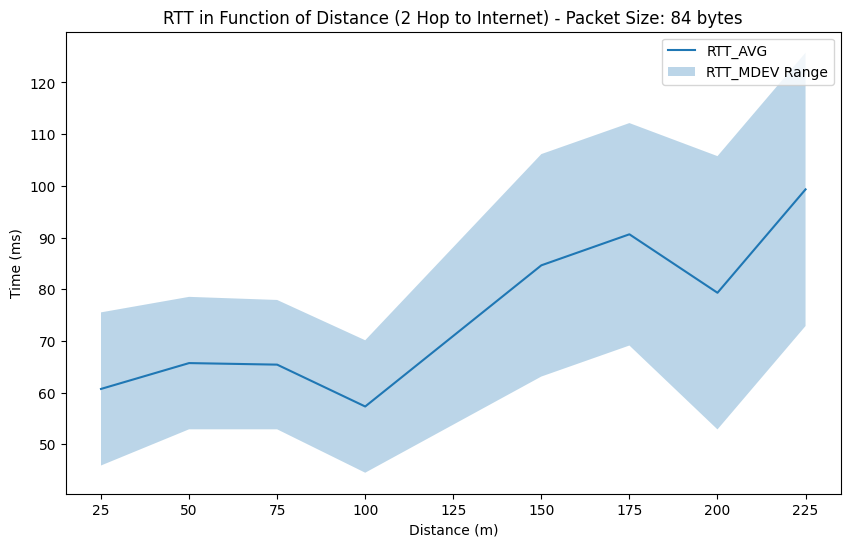

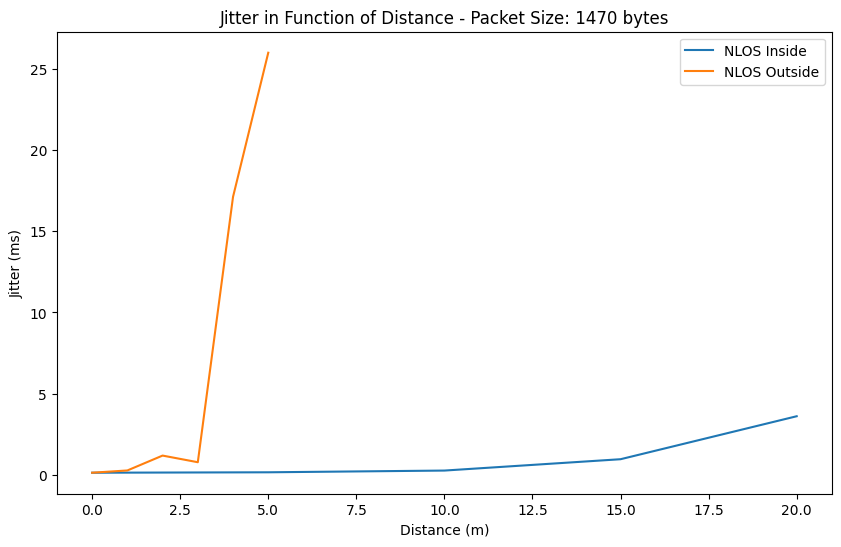

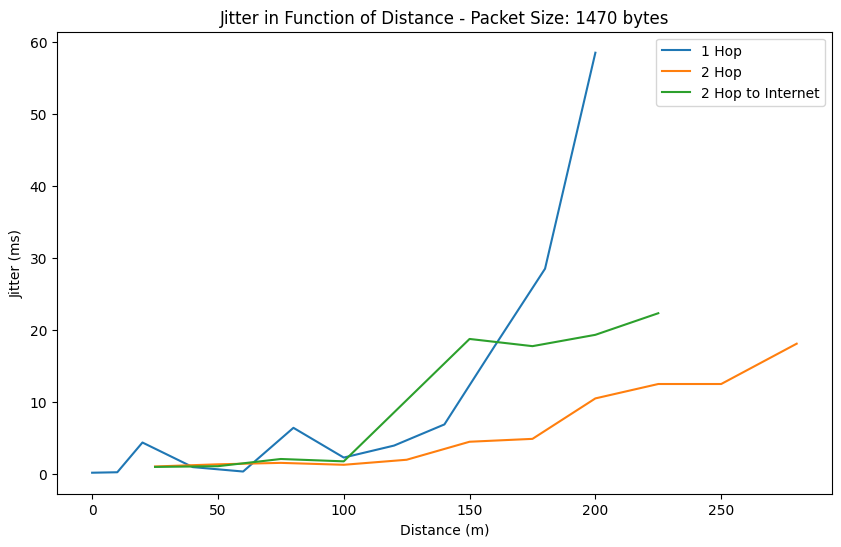

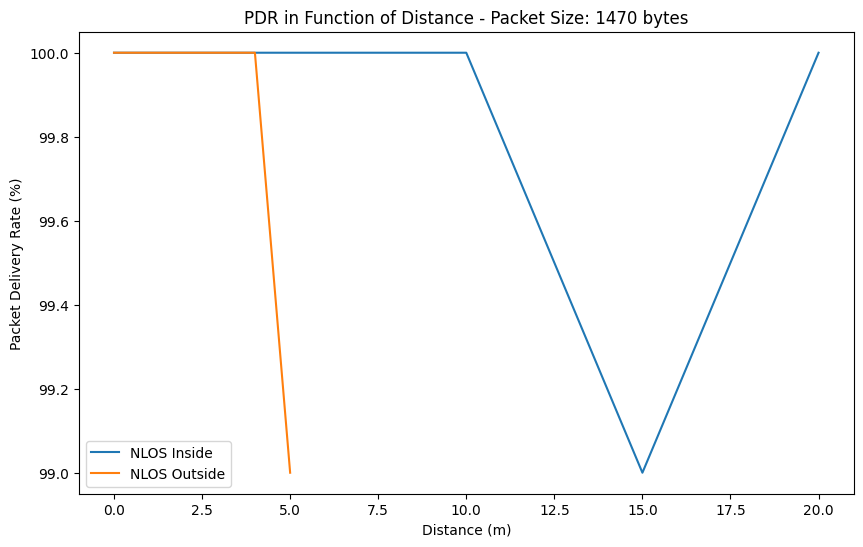

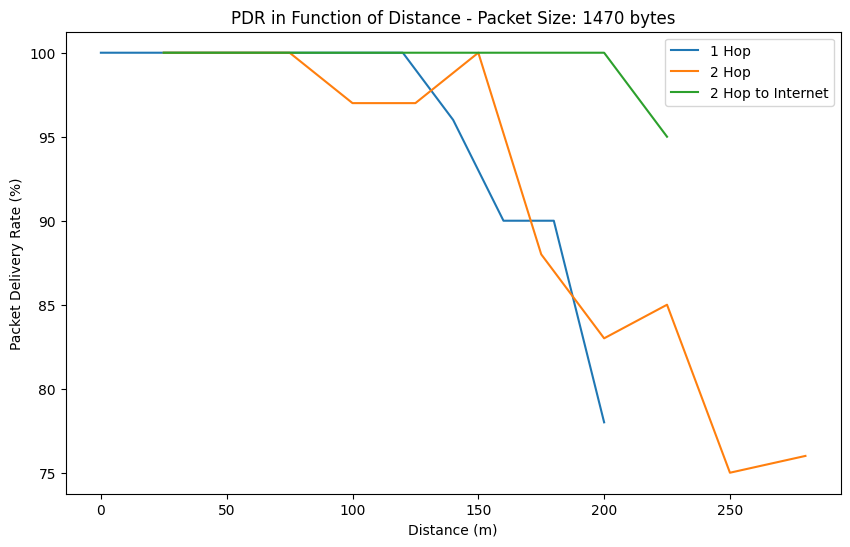

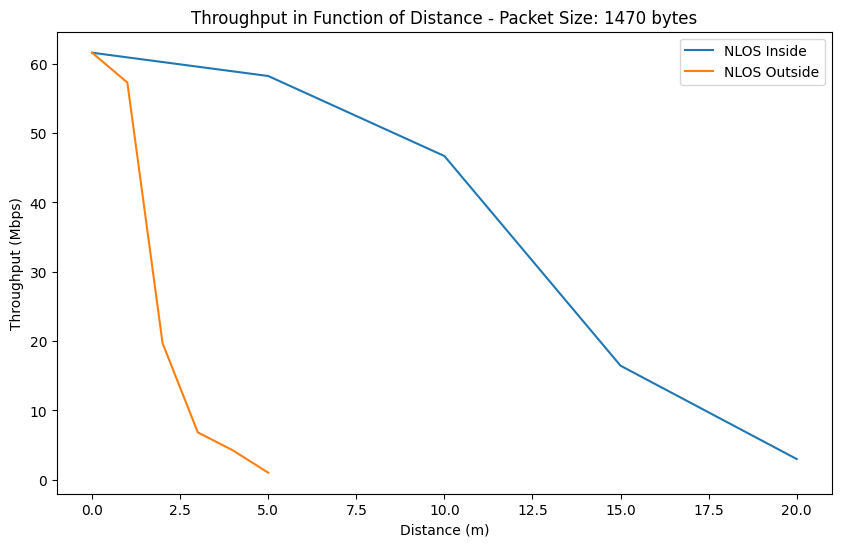

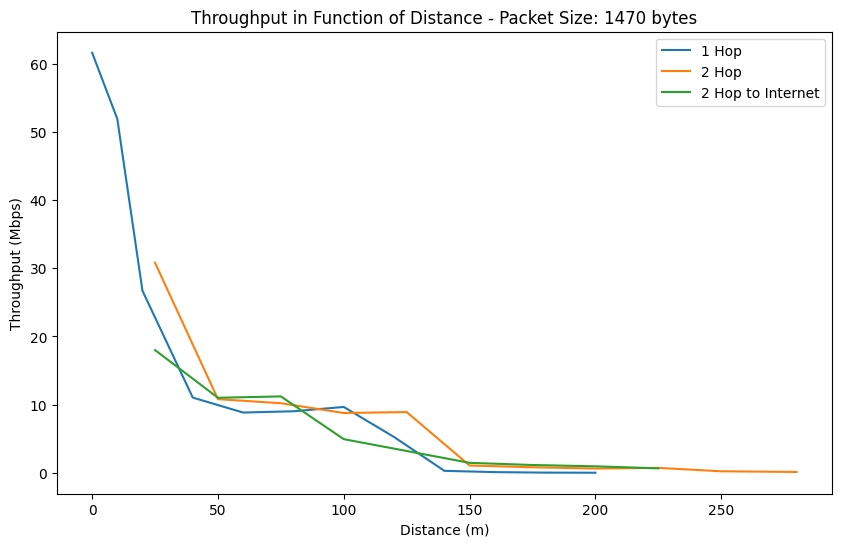

In [84]:
import json
import pandas as pd
import os
import matplotlib.pyplot as plt

# Specify the directories containing the JSON files
directories = ['rpi2/distance/1hop', 'rpi2/nlos/inside', 'rpi2/nlos/outside', 'rpi2/distance/2hop', 'rpi2/distance/2hop-internet']

size = 1470  # default iperf packet size

# Create a list to store the dataframes for each dataset
all_dfs = []

for directory in directories:
    # load data from multiple JSON files into a list of dataframes
    dfs = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if filename.startswith('json_file_'):
            # Extract the distance from the filename
            distance = filename.split('_')[2]
            with open(file_path) as file:
                data = json.load(file)
                data['distance'] = distance  # Add the distance data to the dictionary
                df = pd.DataFrame(data, index=[0])
                dfs.append(df)

    # concatenate all dataframes into a single dataframe
    df = pd.concat(dfs, ignore_index=True)

    # convert the data types
    df = df.astype({"distance": int, "RTT_MIN": float, "RTT_AVG": float, "RTT_MAX": float,
                    "RTT_MDEV": float, "JITTER": float, "THROUGHPUT": float, "PDR": int})

    # Sort the DataFrame by distance
    df.sort_values("distance", inplace=True)
    
    # Append the current dataset's dataframe to the list
    all_dfs.append(df)

    # Calculate the shaded area for RTT plot
    rtt_avg = df["RTT_AVG"]
    rtt_min = df["RTT_MIN"]
    rtt_max = df["RTT_MAX"]
    rtt_mdev = df["RTT_MDEV"]
    upper_bound = rtt_avg + rtt_mdev
    lower_bound = rtt_avg - rtt_mdev

    # Plot RTT with shaded region
    plt.figure(figsize=(10, 6))
    plt.plot(df["distance"], rtt_avg, label="RTT_AVG")
    plt.fill_between(df["distance"], lower_bound, upper_bound, alpha=0.3, label="RTT_MDEV Range")

    plt.xlabel('Distance (m)')
    plt.ylabel('Time (ms)')
    if 'distance/1hop' in directory:
        plt.title(f'RTT in Function of Distance (1 Hop) - Packet Size: 84 bytes')
    elif 'nlos/inside'in directory:
        plt.title(f'RTT in Function of Distance (No LoS Inside) - Packet Size: 84 bytes')
    elif 'nlos/outside' in directory:
        plt.title(f'RTT in Function of Distance (No LoS Outside) - Packet Size: 84 bytes')
    elif 'rpi2/distance/2hop' == directory:
        plt.title(f'RTT in Function of Distance (2 Hop) - Packet Size: 84 bytes')
    elif 'rpi2/distance/2hop-internet' == directory:
        plt.title(f'RTT in Function of Distance (2 Hop to Internet) - Packet Size: 84 bytes')
    else:
        plt.title('RTT in Function of Distance - Packet Size: 84 bytes')
    plt.legend()

    # Save the graph as a PNG file
    plt.savefig(f'RTT_graph_{directory.replace("/", "_")}.png', dpi=300)

    plt.show()

# Plot Jitter for each dataset
plt.figure(figsize=(10, 6))
for i, df in enumerate(all_dfs):
    if (i == 0):
        dataset_name = '1 Hop'
        continue
    elif (i == 1):
        dataset_name = 'NLOS Inside'
    elif (i == 2):
        dataset_name = 'NLOS Outside'
    elif (i == 3):
        dataset_name = '2 Hop'
        continue
    elif (i == 4):
        dataset_name = '2 Hop to Internet'
        continue
    else:
        dataset_name = 'Dataset {i+1}'

    plt.plot(df["distance"], df["JITTER"], label=dataset_name)

plt.xlabel('Distance (m)')
plt.ylabel('Jitter (ms)')
plt.title(f'Jitter in Function of Distance - Packet Size: {size} bytes')
plt.legend()

# Save the graph as a PNG file
plt.savefig(f'Jitter_graph.png', dpi=300)

plt.show()


# Plot Jitter for each dataset
plt.figure(figsize=(10, 6))
for i, df in enumerate(all_dfs):
    if (i == 0):
        dataset_name = '1 Hop'
    elif (i == 1):
        dataset_name = 'NLOS Inside'
        continue
    elif (i == 2):
        dataset_name = 'NLOS Outside'
        continue
    elif (i == 3):
        dataset_name = '2 Hop'
    elif (i == 4):
        dataset_name = '2 Hop to Internet'
    else:
        dataset_name = 'Dataset {i+1}'

    plt.plot(df["distance"], df["JITTER"], label=dataset_name)

plt.xlabel('Distance (m)')
plt.ylabel('Jitter (ms)')
plt.title(f'Jitter in Function of Distance - Packet Size: {size} bytes')
plt.legend()

# Save the graph as a PNG file
plt.savefig(f'Jitter_graph_hop.png', dpi=300)

plt.show()


# Plot PDR for each dataset
plt.figure(figsize=(10, 6))
for i, df in enumerate(all_dfs):
    if (i == 0):
        dataset_name = '1 Hop'
        continue
    elif (i == 1):
        dataset_name = 'NLOS Inside'
    elif (i == 2):
        dataset_name = 'NLOS Outside'
    elif (i == 3):
        dataset_name = '2 Hop'
        continue
    elif (i == 4):
        dataset_name = '2 Hop to Internet'
        continue
    else:
        dataset_name = 'Dataset {i+1}'

    plt.plot(df["distance"], df["PDR"], label=dataset_name)

plt.xlabel('Distance (m)')
plt.ylabel('Packet Delivery Rate (%)')
plt.title(f'PDR in Function of Distance - Packet Size: {size} bytes')
plt.legend()

# Save the graph as a PNG file
plt.savefig(f'PDR_graph.png', dpi=300)

plt.show()


# Plot PDR for each dataset
plt.figure(figsize=(10, 6))
for i, df in enumerate(all_dfs):
    if (i == 0):
        dataset_name = '1 Hop'
    elif (i == 1):
        dataset_name = 'NLOS Inside'
        continue
    elif (i == 2):
        dataset_name = 'NLOS Outside'
        continue
    elif (i == 3):
        dataset_name = '2 Hop'
    elif (i == 4):
        dataset_name = '2 Hop to Internet'
    else:
        dataset_name = 'Dataset {i+1}'

    plt.plot(df["distance"], df["PDR"], label=dataset_name)

plt.xlabel('Distance (m)')
plt.ylabel('Packet Delivery Rate (%)')
plt.title(f'PDR in Function of Distance - Packet Size: {size} bytes')
plt.legend()

# Save the graph as a PNG file
plt.savefig(f'PDR_graph_hop.png', dpi=300)

plt.show()


# Plot Throughput for each dataset
plt.figure(figsize=(10, 6))
for i, df in enumerate(all_dfs):
    if (i == 0):
        dataset_name = '1 Hop'
        continue
    elif (i == 1):
        dataset_name = 'NLOS Inside'
    elif (i == 2):
        dataset_name = 'NLOS Outside'
    elif (i == 3):
        dataset_name = '2 Hop'
        continue
    elif (i == 4):
        dataset_name = '2 Hop to Internet'
        continue
    else:
        dataset_name = 'Dataset {i+1}'

    plt.plot(df["distance"], df["THROUGHPUT"], label=dataset_name)

plt.xlabel('Distance (m)')
plt.ylabel('Throughput (Mbps)')
plt.title(f'Throughput in Function of Distance - Packet Size: {size} bytes')
plt.legend()

# Save the graph as a PNG file
plt.savefig(f'Throughput_graph.png', dpi=300)

plt.show()


# Plot Throughput for each dataset
plt.figure(figsize=(10, 6))
for i, df in enumerate(all_dfs):
    if (i == 0):
        dataset_name = '1 Hop'
    elif (i == 1):
        continue
    elif (i == 2):
        continue
    elif (i == 3):
        dataset_name = '2 Hop'
    elif (i == 4):
        dataset_name = '2 Hop to Internet'
    else:
        dataset_name = 'Dataset {i+1}'

    plt.plot(df["distance"], df["THROUGHPUT"], label=dataset_name)

plt.xlabel('Distance (m)')
plt.ylabel('Throughput (Mbps)')
plt.title(f'Throughput in Function of Distance - Packet Size: {size} bytes')
plt.legend()

# Save the graph as a PNG file
plt.savefig(f'Throughput_graph_hop.png', dpi=300)

plt.show()